# <center> A <center>

In [12]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

theta = sym.symbols('theta')

# Material properties
E_L = 400 #GPa
E_L = 400e9 #Pa
E_T = 50 #GPa
E_T = 50e9 #Pa
nu_LT = 0.1
# nu_TL = E_T/E_L*nu_LT
nu_TL = E_T/E_L*nu_LT
G_LT = 40 #GPa
G_LT = 40e9 #Pa
t = 0.1 #mm
t = 0.1e-3 #m
angle_list = [0, theta, -theta]
repetitions = 1
symmetry = True
N_x = 0 # [N/m]
N_y = 0 # [N/m]
N_xy = 10_000 # [N/m]
M_x = 0 # [Nm/m]
M_y = 0 # [Nm/m]
M_xy = 10 # [Nm/m]


In [13]:
# Q matrix
Q = sym.Matrix([[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]])

T_sigma = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                   [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                   [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
T_epsilon = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, sym.cos(theta)*sym.sin(theta)],
                     [sym.sin(theta)**2, sym.cos(theta)**2, -sym.cos(theta)*sym.sin(theta)],
                     [-2*sym.cos(theta)*sym.sin(theta), 2*sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])

Q_list = []
def Q_bar():
    Q_bar = sym.Matrix((T_sigma.inv()) * Q * T_epsilon)
    for angle in angle_list:
        Q_list.append(sym.nsimplify(Q_bar.subs(theta, angle)))
    return Q_list

Q_list = Q_bar()
A = sym.Matrix.zeros(3,3)
for i in range(len(Q_list)):
    A += 2*t*Q_list[i]

display(sym.simplify(A))
A_inv = A.inv()

Matrix([
[ 112220275.34418*sin(theta)**4 - 252395494.36796*sin(theta)**2 + 240300375.469337, -112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 3003754.69336671,                                                                           0],
[-112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 3003754.69336671, 112220275.34418*sin(theta)**4 + 27954943.6795995*sin(theta)**2 + 30037546.9336671,                                                                           0],
[                                                                                0,                                                                                 0, -112220275.34418*sin(theta)**4 + 112220275.34418*sin(theta)**2 + 24000000.0]])

### The above matrix is matrix A

The third row and the third column are zero, apart from the element in both the third row and third column (--> A is an isotropic matrix). This means that there is no bending-twisting coupling. This is as expected since we have an quasi-isotropic laminate.

In [14]:
def BD_func(symmetric=False, repetitions=1, t=1):
    D = sym.Matrix.zeros(3,3)
    B = 0
    m=0
    if not symmetric:
        for i in np.arange(repetitions/2 * len(angle_list), -repetitions/2 * len(angle_list), -1):
            B += ((t*i)**2-(t*(i-1))**2)/2 * Q_list[m]
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0
        
    if symmetric:
        B = sym.Matrix.zeros(3,3)
        repetitions = repetitions*2
        for i in np.arange(len(angle_list), 0, -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m += 1
            if m == len(angle_list):
                m = 0

        if m == 0:
                m = len(angle_list)-1
                
        for i in np.arange(0, -len(angle_list), -1):
            D += ((t*i)**3-(t*(i-1))**3)/3 * Q_list[m]
            m -= 1
            if m == -len(angle_list):
                m = 0
                
    return B, D

B, D = BD_func(symmetric=True, repetitions=1, t=1)
display(sym.nsimplify(B)/1e9)
display(sym.simplify(D)/1e9)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Matrix([
[ 1496.2703379224*sin(theta)**4 - 3365.27325823947*sin(theta)**2 + 7209.0112640801,  -1496.2703379224*sin(theta)**4 + 1496.2703379224*sin(theta)**2 + 90.1126408010013,             350.43804755945*sin(2*theta) + 140.275344180225*sin(4*theta)],
[-1496.2703379224*sin(theta)**4 + 1496.2703379224*sin(theta)**2 + 90.1126408010013, 1496.27033792241*sin(theta)**4 + 372.732582394659*sin(theta)**2 + 901.126408010012,             350.43804755945*sin(2*theta) - 140.275344180225*sin(4*theta)],
[                    350.438047559449*sin(2*theta) + 140.275344180225*sin(4*theta),                       350.43804755945*sin(2*theta) - 140.275344180225*sin(4*theta), -1496.27033792241*sin(theta)**4 + 1496.27033792241*sin(theta)**2 + 720.0]])

### Above we have the B and D matrices respectively

Non-composite material (monolithic) bend and twist under aerodynamic loads. Composite materials bend, but do not twist. This is noticeable because the order of magnitude of the third row and column is much smaller than the order of magnitude of the diagonal. And at $\theta=0$ the third row and column (apart form $D_{66}$) are $0$. This wouldn't happen if it was a monolithic isotropic plate.

# TO WORK ON

In [15]:
N_matrix = sym.Matrix([N_x, N_y, N_xy])
N_matrix = N_matrix.T
M_matrix = sym.Matrix([M_x, M_y, M_xy])
M_matrix = M_matrix.T
NM_matrix = sym.Matrix.hstack(N_matrix, M_matrix)
NM_matrix = NM_matrix.T
display(NM_matrix)


Matrix([
[    0],
[    0],
[10000],
[    0],
[    0],
[   10]])

In [16]:
# [[epsilon], [-kappa]] = [[A, B], [B, D]]^-1 @ [[N], [M]]
AB_matrix = sym.Matrix.hstack(A, B)
AB_matrix = AB_matrix.T
BD_matrix = sym.Matrix.hstack(B, D)
BD_matrix = BD_matrix.T
matrix_f = sym.Matrix.hstack(AB_matrix, BD_matrix)
matrix_f = matrix_f.T
matrix_f_inv = matrix_f.inv()
print(matrix_f_inv.shape)
print(NM_matrix.shape)


(6, 6)
(6, 1)


In [17]:
display(matrix_f_inv)
display(NM_matrix)
epsilon_kappa_matrix = matrix_f_inv * NM_matrix
epsilon_matrix = sym.Matrix(epsilon_kappa_matrix[:3])
display(epsilon_matrix)

Matrix([
[(1.70425798205203e+36*sin(theta)**124 + 1.03612709879841e+38*sin(theta)**122*cos(theta)**2 + 3.09995162803567e+39*sin(theta)**120*cos(theta)**4 + 6.08383568052005e+40*sin(theta)**118*cos(theta)**6 + 8.80859563800353e+41*sin(theta)**116*cos(theta)**8 + 1.00332170141336e+43*sin(theta)**114*cos(theta)**10 + 9.36205425316844e+43*sin(theta)**112*cos(theta)**12 + 7.35857022035719e+44*sin(theta)**110*cos(theta)**14 + 4.97183044672551e+45*sin(theta)**108*cos(theta)**16 + 2.93243443672091e+46*sin(theta)**106*cos(theta)**18 + 1.52815730956677e+47*sin(theta)**104*cos(theta)**20 + 7.10457596987906e+47*sin(theta)**102*cos(theta)**22 + 2.97012302237325e+48*sin(theta)**100*cos(theta)**24 + 1.12390252726836e+49*sin(theta)**98*cos(theta)**26 + 3.87076471437841e+49*sin(theta)**96*cos(theta)**28 + 1.21902248205247e+50*sin(theta)**94*cos(theta)**30 + 3.52461662628839e+50*sin(theta)**92*cos(theta)**32 + 9.38843072285126e+50*sin(theta)**90*cos(theta)**34 + 2.310723080166e+51*sin(theta)**88*cos(the

Matrix([
[    0],
[    0],
[10000],
[    0],
[    0],
[   10]])

Matrix([
[                                                                                                                                                                                  0],
[                                                                                                                                                                                  0],
[10000*(1.0*sin(theta)**4 + 2.0*sin(theta)**2*cos(theta)**2 + 1.0*cos(theta)**4)/(24000000.0*sin(theta)**4 + 160220275.34418*sin(theta)**2*cos(theta)**2 + 24000000.0*cos(theta)**4)]])

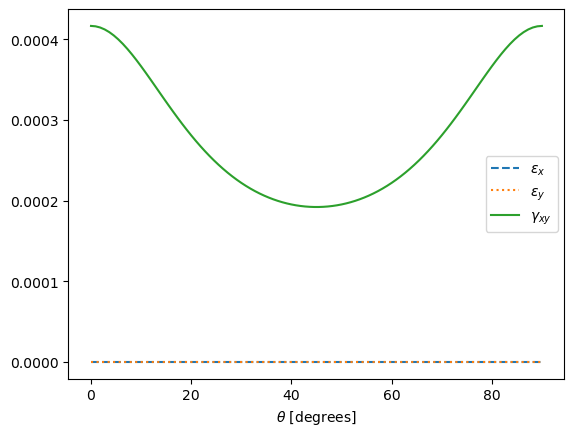

In [18]:
# Lambdify the expression
epsilon_func_0 = sym.lambdify(theta, epsilon_matrix[0], modules=['numpy'])
epsilon_func_1 = sym.lambdify(theta, epsilon_matrix[1], modules=['numpy'])
epsilon_func_2 = sym.lambdify(theta, epsilon_matrix[2], modules=['numpy'])

# Create a range of theta
theta_range = np.linspace(0, np.pi/2, 100)

eps_0 = [epsilon_func_0(theta) for theta in theta_range]
eps_1 = [epsilon_func_1(theta) for theta in theta_range]
eps_2 = [epsilon_func_2(theta) for theta in theta_range]

# Calculate the epsilon
# Plot the results
plt.plot(np.degrees(theta_range), eps_0, label=r'$\epsilon_x$', linestyle='--')
plt.plot(np.degrees(theta_range), eps_1, label=r'$\epsilon_y$', linestyle=':')
plt.plot(np.degrees(theta_range), eps_2, label=r'$\gamma_{xy}$')
plt.xlabel(r'$\theta$ [degrees]')
plt.legend()
plt.show()

In [19]:
X_t = 700e6
X_c = -800e6
Y_t = 150e6
Y_c = -300e6
S = 150e6

# Q matrix
Q = [[E_L/(1-nu_LT*nu_TL), E_L*nu_TL/(1-nu_LT*nu_TL), 0],
     [E_L*nu_TL/(1-nu_LT*nu_TL), E_T/(1-nu_LT*nu_TL), 0],
     [0, 0, G_LT]]

T_sigma = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, 2*np.cos(theta)*np.sin(theta)],
                   [np.sin(theta)**2, np.cos(theta)**2, -2*np.cos(theta)*np.sin(theta)],
                   [-np.cos(theta)*np.sin(theta), np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]
T_epsilon = lambda theta: [[np.cos(theta)**2, np.sin(theta)**2, np.cos(theta)*np.sin(theta)],
                     [np.sin(theta)**2, np.cos(theta)**2, -np.cos(theta)*np.sin(theta)],
                     [-2*np.cos(theta)*np.sin(theta), 2*np.cos(theta)*np.sin(theta), np.cos(theta)**2-np.sin(theta)**2]]

Q_bar = lambda theta: np.dot(np.dot(np.linalg.inv(T_sigma(theta)), Q), T_epsilon(theta))

angle = np.linspace(0, np.pi/2, 91)
angle_list = [x for x in angle]

# Q_list = []
# for angle in angle_list:
#     Q_list.append(Q_bar(angle))

# Q = sym.Matrix(Q)
# A = 2*t*(sum(Q_list))
# A_inv = np.linalg.inv(A)
# eps_naught = sym.Matrix(np.dot(A_inv, [N_x, N_y, 0]))
def Tsai_eps():
    T_eps = sym.Matrix([[sym.cos(theta)**2, sym.sin(theta)**2, 2*sym.cos(theta)*sym.sin(theta)],
                [sym.sin(theta)**2, sym.cos(theta)**2, -2*sym.cos(theta)*sym.sin(theta)],
                [-sym.cos(theta)*sym.sin(theta), sym.cos(theta)*sym.sin(theta), sym.cos(theta)**2-sym.sin(theta)**2]])
    return T_eps

def Tsai_hill(sigma_x, sigma_y, tau_xy):
    value = sigma_x**2/(X_c**2) - sigma_x*sigma_y/(X_c**2) + sigma_y**2/(Y_c**2) + tau_xy**2/(S**2)
    return value

T_eps = Tsai_eps()
# def Tsai_hill_criterion(epsilon_matrix, angle_list):
#     for angle in angle_list:
#         T_eps_theta = T_eps.subs(theta, angle)
#         epsilon_matrix = epsilon_matrix.subs(theta, angle)
#         sigma_theta = Q*(T_eps_theta*epsilon_matrix)
#         sigma_x, sigma_y, tau_xy = sigma_theta
#         Tsai_hill_value = Tsai_hill(sigma_x, sigma_y, tau_xy)
#         # if Tsai_hill_value > 1:
#         #     print(f'Angle {np.rad2deg(angle)} is not safe')
#         if Tsai_hill_value < 1:
#             print(f'No failure at angle {np.rad2deg(angle)}')

# Tsai_hill_criterion(epsilon_matrix, angle_list)

In addition to the slides I used the following resources:

https://www.sciencedirect.com/topics/engineering/quasi-isotropic-laminate

In [29]:
angle = np.linspace(0, np.pi/2, 91)
angle_list = [x for x in angle]

N_matrix = sym.Matrix([N_x, N_y, N_xy])
display(N_matrix)
def Tsai_hill_criterion(angle_list):
    for angle in angle_list:
        Q_list = []
        Q_list.append(Q_bar(0))
        Q_list.append(Q_bar(angle))
        Q_list.append(Q_bar(-angle))
        A = 2*t*sum(Q_list)
        A_inv = np.linalg.inv(A)
        epsilon = A_inv * N_matrix
        sigma_theta = Q_bar(angle) * T_sigma(angle) * epsilon
        sigma_x, sigma_y, tau_xy = sigma_theta
        Tsai_hill_value = Tsai_hill(sigma_x, sigma_y, tau_xy)
        print(f'{Tsai_hill_value}')
        if Tsai_hill_value > 1:
            print(f'Angle {np.rad2deg(angle)} is not safe')

Tsai_hill_criterion(angle_list)

Matrix([
[    0],
[    0],
[10000]])

0.0123456790123457
0.0123481914617270
0.0123553798223814
0.0123662083480472
0.0123789885356508
0.0123914366878807
0.0124007554904668
0.0124037388292944
0.0123968971175266
0.0123765981734694
0.0123392167374362
0.0122812845082476
0.0121996323727750
0.0120915172979106
0.0119547279451737
0.0117876651243736
0.0115893953725847
0.0113596779313909
0.0110989669995619
0.0108083922663479
0.0104897213788086
0.0101453082239324
0.00977803080511676
0.00939122216442071
0.00898859734088613
0.00857417883833886
0.00815222256056612
0.00772714569542201
0.00730345761372156
0.00688569450272233
0.00647835817781109
0.00608585930449021
0.00571246510772614
0.00536225153789033
0.00503905979267508
0.00474645705406900
0.00448770128144273
0.00426570989999603
0.00408303223345372
0.00394182554728539
0.00384383459113594
0.00379037455466173
0.00378231737827947
0.00382008138866080
0.00390362425772721
0.00403243931327157
0.00420555525918461
0.00442153939372752
0.00467850444551642
0.00497411917897031
0.00530562295388702
0.

In [38]:
angle = np.linspace(0, np.pi/2, 91)
angle_list1 = [x for x in angle]

for angles in angle_list1:
    angle_list = [0, angles, -angles]
    Q_list = []
    for angle in angle_list:
        Q_list.append(Q_bar(angle))

    A = 2*t*sum(Q_list)
    A_inv = np.linalg.inv(A.astype('float64'))
    def Tsai_hill_criterion(epsilon_matrix, angle_list):
        for angle in angle_list:
            T_eps_theta = T_eps.subs(theta, angle)
            epsilon_matrix = epsilon_matrix.subs(theta, angle)
            sigma_theta = Q*(T_eps_theta*epsilon_matrix)
            sigma_x, sigma_y, tau_xy = sigma_theta
            Tsai_hill_value = Tsai_hill(sigma_x, sigma_y, tau_xy)
            if Tsai_hill_value > 1:
                print(f'Angle {np.rad2deg(angle)} is not safe')
            # if Tsai_hill_value < 1:
            #     print(f'No failure at angle {np.rad2deg(angle)} {Tsai_hill_value}')

    Tsai_hill_criterion(epsilon_matrix, angle_list)